In [309]:
# Import the necessary libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D, ReLU, BatchNormalization, GlobalAveragePooling2D, Input 


from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [310]:
# Load the data
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [311]:
# Split and normalize the data
# Dividing by 255.0 normalizes the data to the range [0, 1]
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Define the classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [312]:
# Define the neural network model
# model = Sequential([
#     # Flatten the 28x28 Images into a 1D array
#     Flatten(input_shape=(28, 28)),
#     # Adds a dense hidden layer with 128 neurons and relu activation
#     # Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     # Adds a dense hidden layer with 64 neurons and relu activation
#     Dense(64, activation='relu'),
#     # Add a dropout layer with 0.2 dropout rate
#     Dropout(0.2),
#     # Adds a dense output layer with 10 neurons and softmax activation
#     Dense(10, activation='softmax')
# ])

model = Sequential([
    # Define the input shape
    Input(shape=(28, 28, 1)),

    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    # Second convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    # Third convolutional layer
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),

    
    # Flatten(),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [313]:
# Info about the model
model.summary()

# Show the weights and biases of the first hidden layer
weights, biases = model.layers[8].get_weights()

print(f"Weights: {weights}")

print(f"Weights shape: {weights.shape}")

print(f"Biases: {biases}")

print(f"Biases shape: {biases.shape}")


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_88 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 11, 11, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,330 (1.41 MB)

 Trainable params: 367,498 (1.40 MB)

 Non-trainable params: 832 (3.25 KB)

Weights: [[[[ 0.01070191 -0.02216939 -0.0031631  ...  0.00692385 -0.02751025
     0.0013231 ]
   [-0.0032806  -0.02570679 -0.00017832 ... -0.00727691 -0.02166649
    -0.02512868]
   [ 0.02294193  0.01792601  0.0095841  ...  0.01370228 -0.02872888
    -0.03067695]
   ...
   [-0.00865625 -0.04084235  0.00170679 ...  0.031286   -0.00041558
    -0.00508605]
   [ 0.01431661 -0.00819269  0.02992936 ...  0.03089311  0.00702365
     0.03102983]
   [-0.01605057  0.02242414  0.02220554 ...  0.02749479  0.04016151
     0.01143567]]

  [[-0.02605752 -0.00616817 -0.03134121 ...  0.03667105 -0.00677589
     0.01385675]
   [ 0.00425261  0.01139314  0.03489826 ... -0.02006426  0.00625527
     0.0358075 ]
   [-0.03824788 -0.00011277 -0.00340464 ...  0.04098006  0.02674146
    -0.00435084]
   ...
   [ 0.026973    0.01875859  0.03003553 ... -0.03676685  0.0058955
     0.01868883]
   [ 0.03554974 -0.02998412  0.03182337 ... -0.0132782  -0.00937007
     0.03507108]
   [-0.00047504  0.01955213  0.00327517 .

In [314]:
# Compile the model
model.compile(
    # Use the categorical crossentropy loss function
    # loss='categorical_crossentropy',
    # Use the sparse categorical crossentropy loss function
    loss='sparse_categorical_crossentropy',
    # Use the sgd optimizer
    # optimizer='sgd',
    # Use the adam optimizer
    # optimizer='adam',
    optimizer=SGD(learning_rate=0.1),
    # Use accuracy as the performance metric
    metrics=['accuracy']
)

In [315]:
# Training and evaluating the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_valid, y_valid)
)

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7319 - loss: 0.7382 - val_accuracy: 0.8292 - val_loss: 0.4545
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8522 - loss: 0.4091 - val_accuracy: 0.8444 - val_loss: 0.4055
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8711 - loss: 0.3559 - val_accuracy: 0.8784 - val_loss: 0.3227
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8855 - loss: 0.3174 - val_accuracy: 0.8682 - val_loss: 0.3405
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8885 - loss: 0.3109 - val_accuracy: 0.9008 - val_loss: 0.2820
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8945 - loss: 0.2880 - val_accuracy: 0.8756 - val_loss: 0.3262
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9010 - loss: 0.2714 - val_accuracy: 0.9054 - val_loss: 0.2630
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9066 - loss: 0.2569 - val_accuracy: 0.

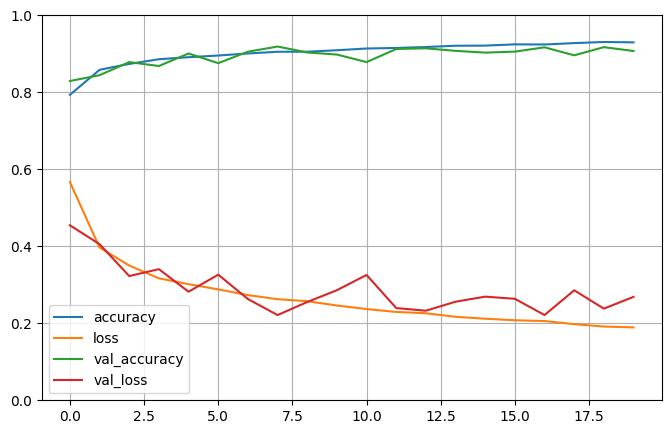

In [316]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9021 - loss: 0.2798
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


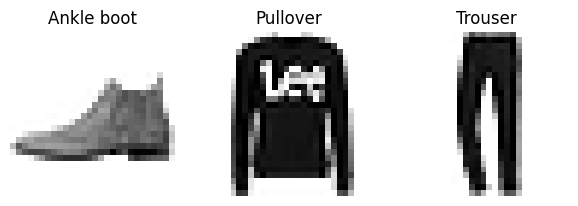

In [317]:
model.evaluate(x_test / 255.0, y_test)

# Predict the class of the first 3 test images
y_pred = model.predict(x_test[:3] / 255.0)

# Print the predicted class for the first 3 test images
print(np.argmax(y_pred, axis=1))
# Print the predicted class name
print(np.array(class_names)[np.argmax(y_pred, axis=1)])

# Print the actual class for the first 3 test images
print(y_test[:3])
# Print the actual class name
print(np.array(class_names)[y_test[:3]])

# Print the images of the first 3 test images
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.show()